AirBnb
The goal of this project is to predict Airbnb's users first location that is booked using user demographic and activity information. This is actually a kaggle competition, so the data is taken from there. The features that will be reviewed for validity in the prediction will be demographic data, timestamp activity on the website, devices used, browsers, affiliate information, language preferences. I will expand on this goal by also trying to predict the amount of 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
loc = r"C:\Users\user\Desktop\kagglehelp\airbnb"
tr_users=pd.read_csv(loc+"\\train_users_2.csv")

In [3]:
tr_users.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [4]:
x_cols=[i for i in tr_users.columns.values[4:-1]]
tr_users.head()
    

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
# Columns that need to be encoded 
cols_enc=['gender', 'signup_method', 'language', 'affiliate_channel',
          'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
          'first_device_type', 'first_browser' ]

y_enc='country_destination'


In [34]:
# transform label type columns for usability in pandas
tr_users.dtypes
from sklearn.preprocessing import LabelEncoder 
# Label encoder applies a numeric label. inverse_transform - transforms it back
# tr_users=tr_users.apply(LabelEncoder().fit_transform)

# Encodes all columns and creates a seperate encoding function for each
enc_lib={}
for i in tr_users:
#     enc_lib[i]=LabelEncoder().fit_transform(tr_users[i])
    enc_lib[i]=LabelEncoder()

In [35]:
tr_users_adj=tr_users
for i in tr_users[cols_enc]:
    tr_users_adj[i]=enc_lib[i].fit_transform(tr_users[i])
tr_users_adj[y_enc]=enc_lib[y_enc]
tr_users_adj.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,month_created,year_created
0,gxn3p5htnn,2010-06-28,20090319043255,NaT,0,0,1,0,5,2,4,7,2,3,8,LabelEncoder(),6,2010
1,820tgsjxq7,2011-05-25,20090523174809,NaT,2,27,1,0,5,7,8,7,2,3,8,LabelEncoder(),5,2011
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,1,45,0,3,5,2,4,7,2,6,21,LabelEncoder(),9,2010
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,1,31,1,0,5,2,4,7,2,3,17,LabelEncoder(),12,2011
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,0,30,0,0,5,2,4,7,2,3,8,LabelEncoder(),9,2010


In [8]:

tr_users_adj["date_account_created"]=pd.to_datetime(tr_users_adj["date_account_created"])
tr_users_adj["date_first_booking"]=pd.to_datetime(tr_users_adj["date_first_booking"])
tr_users_adj["month_created"]=pd.to_datetime(tr_users_adj["date_account_created"]).dt.month
tr_users_adj["year_created"]=pd.to_datetime(tr_users_adj.date_account_created).dt.year
tr_users_adj.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active              int64
date_first_booking         datetime64[ns]
gender                              int64
age                               float64
signup_method                       int64
signup_flow                         int64
language                            int64
affiliate_channel                   int64
affiliate_provider                  int64
first_affiliate_tracked             int64
signup_app                          int64
first_device_type                   int64
first_browser                       int64
country_destination                 int64
month_created                       int64
year_created                        int64
dtype: object

In [12]:
for k,v in tr_users_plt.age.iteritems():
#     print k
    if tr_users_plt['age'][k]>100:
        tr_users_plt.loc[k,'age']=np.NaN
    if k % 10000 == 0:
        print k
#         print tr_users_plt['age'][k]
        
#     tr_users_plt['age'>100]=np.nan


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000


In [20]:
# export the new ages
import csv
with open(loc+'\\ages.csv', 'wb') as f:
    writer=csv.writer(f)
    writer.writerow(['Age'])
    for i in tr_users_plt.age:
        writer.writerow([str(i)])
    

In [9]:
ages=pd.read_csv(loc+'\\ages.csv')
ages.head()
for k,v in ages['Age'].iteritems():
    if pd.isnull(ages.Age[k]):
        ages.loc[k, 'Age']=0

ages.Age[0]
tr_users_adj['age']=ages['Age']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010596F28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E8DF668>]], dtype=object)

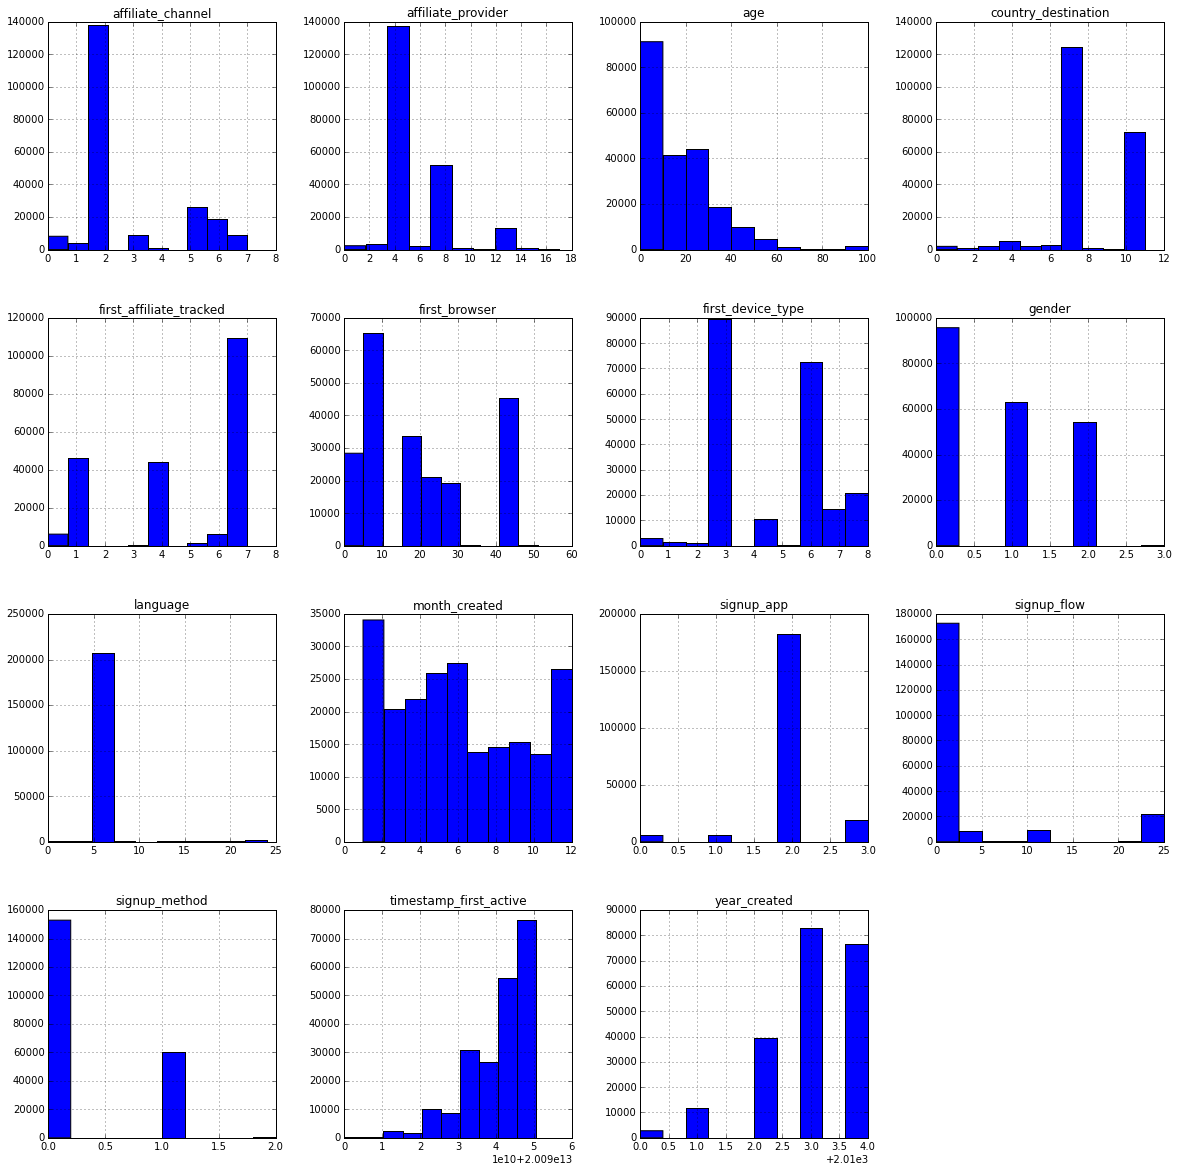

In [11]:
%matplotlib inline
tr_users_adj.hist(figsize=(20,20))

In [13]:
tr_users_adj.columns

Index([u'id', u'date_account_created', u'timestamp_first_active', u'gender',
       u'age', u'signup_method', u'signup_flow', u'language',
       u'affiliate_channel', u'affiliate_provider', u'first_affiliate_tracked',
       u'signup_app', u'first_device_type', u'first_browser', u'month_created',
       u'year_created', u'date_first_booking', u'country_destination'],
      dtype='object')

In [24]:
# split the data into arrays
# use train_test_split
# call classifier
# fit classifier
# score classifier

# note train_test_split takes only arrays
from sklearn.cross_validation import train_test_split

# reorder tr_users_adj
reorder_col=[col for col in tr_users_adj if col not in ['country_destination', 'date_first_booking']]+['date_first_booking', 'country_destination']
tr_users_adj=tr_users_adj[reorder_col]



# split x and y data 
y=tr_users_adj.values[:,-1]
X=tr_users_adj.values[:,2:-3]
y=np.array(y).tolist()
X=np.array(X).tolist()
print y[:20]
print X[:20]





[7L, 7L, 10L, 11L, 10L, 10L, 10L, 10L, 10L, 10L, 10L, 7L, 4L, 7L, 7L, 1L, 7L, 10L, 7L, 4L]
[[20090319043255L, 0L, 0.0, 1L, 0L, 5L, 2L, 4L, 7L, 2L, 3L, 8L, 6L], [20090523174809L, 2L, 27.0, 1L, 0L, 5L, 7L, 8L, 7L, 2L, 3L, 8L, 5L], [20090609231247L, 1L, 45.0, 0L, 3L, 5L, 2L, 4L, 7L, 2L, 6L, 21L, 9L], [20091031060129L, 1L, 31.0, 1L, 0L, 5L, 2L, 4L, 7L, 2L, 3L, 17L, 12L], [20091208061105L, 0L, 30.0, 0L, 0L, 5L, 2L, 4L, 7L, 2L, 3L, 8L, 9L], [20100101215619L, 0L, 0.0, 0L, 0L, 5L, 3L, 12L, 4L, 2L, 3L, 8L, 1L], [20100102012558L, 1L, 35.0, 0L, 0L, 5L, 3L, 2L, 7L, 2L, 3L, 41L, 1L], [20100103191905L, 1L, 36.0, 0L, 0L, 5L, 2L, 4L, 4L, 2L, 3L, 41L, 1L], [20100104004211L, 1L, 39.0, 0L, 0L, 5L, 3L, 2L, 7L, 2L, 3L, 41L, 1L], [20100104023758L, 0L, 35.0, 0L, 0L, 5L, 3L, 2L, 4L, 2L, 3L, 17L, 1L], [20100104194251L, 1L, 25.0, 0L, 0L, 5L, 3L, 2L, 7L, 2L, 3L, 17L, 1L], [20100105051812L, 1L, 36.0, 0L, 0L, 5L, 3L, 2L, 7L, 2L, 8L, 0L, 1L], [20100105060859L, 0L, 0.0, 0L, 0L, 5L, 2L, 4L, 0L, 2L, 4L, 0L, 1L], [2010

In [77]:
tr_users_adj.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,month_created,year_created,date_first_booking,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,0,NaN,1,0,5,2,4,7,2,3,8,6,2010,NaT,7
1,820tgsjxq7,2011-05-25,20090523174809,2,27,1,0,5,7,8,7,2,3,8,5,2011,NaT,7
2,4ft3gnwmtx,2010-09-28,20090609231247,1,45,0,3,5,2,4,7,2,6,21,9,2010,2010-08-02,10
3,bjjt8pjhuk,2011-12-05,20091031060129,1,31,1,0,5,2,4,7,2,3,17,12,2011,2012-09-08,11
4,87mebub9p4,2010-09-14,20091208061105,0,30,0,0,5,2,4,7,2,3,8,9,2010,2010-02-18,10


In [25]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=0)

In [27]:
# fit the naive bayes model
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train, y_train)

# predict from the model
# pred=clf.predict(X_test)

# mean accuracy on test data and labels
clf.score(X_test,y_test)

0.54847625963317792

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf2=RandomForestClassifier()
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.57281394204867542

In [33]:
# import the test data

test=pd.read_csv(loc+'//test_users.csv')
testtest.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [47]:
enc_lib['gender'].classes_
enc_lib['first_browser'].classes_


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51], dtype=int64)

In [43]:
test_adj=test
# for i in test[cols_enc]:
cols_enc2=['gender', 'signup_method']
for i in test[cols_enc2]:
    print i
    test_adj[i]=enc_lib[i].transform(test[i])
# test_adj.head()

gender


ValueError: y contains new labels: [<bound method LabelEncoder.transform of LabelEncoder()>]

In [31]:
from pandas.tools.plotting import scatter_matrix
# columns to use


# scat=scatter_matrix(tr_users_adj[cols_enc], figsize=(8,8))

ERROR! Session/line number was not unique in database. History logging moved to new session 88


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002B6AB390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002C2EDF98>]], dtype=object)

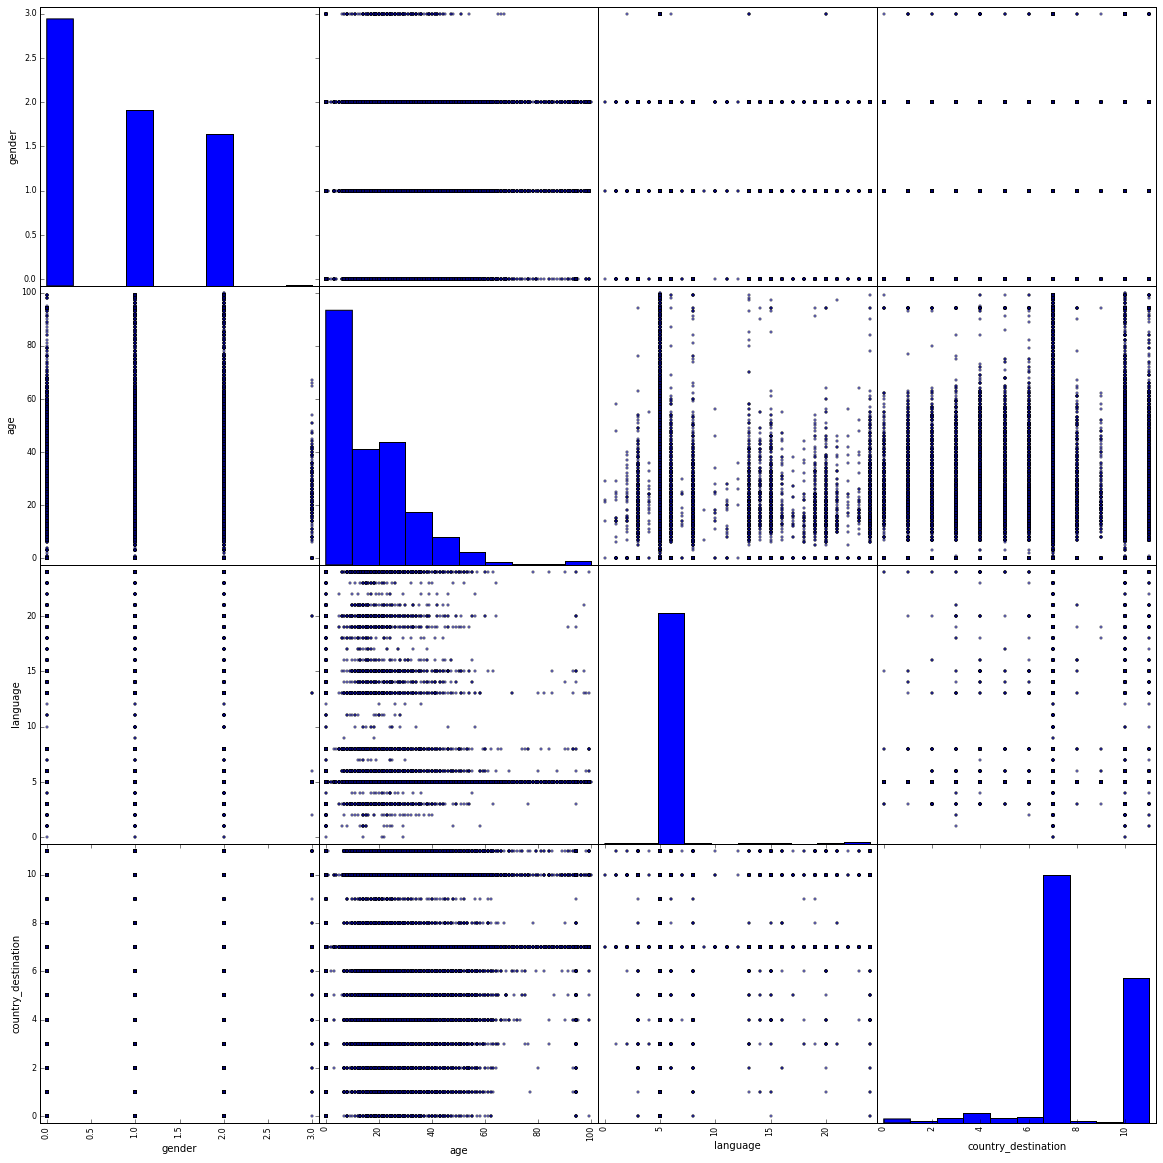

In [32]:
%matplotlib inline

scat=scatter_matrix(tr_users_adj[['gender', 'age', 'language', 'country_destination']],
                   figsize=(20,20))

scat

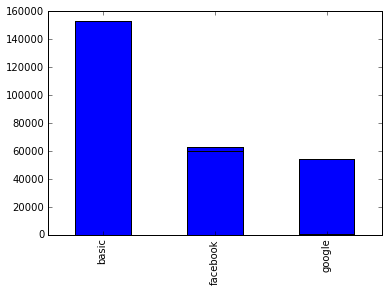

In [81]:
tr_users.gender.value_counts()

# plt.figure(1)
# plt.subplot(211)
# plt.title('gender')
p1=tr_users.gender.value_counts().plot(kind='bar')
# p1.xticks(range(len(tr_users.gender.values())), tr_users.gender.values(), rotation=90)
# plt.subplot(212)
p2=tr_users.signup_method.value_counts().plot(kind='bar')


In [ ]:
lang_count_plt=plt()
